In [1]:
# Para ocultar los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
%matplotlib inline

# Example 14-5
An article in Solid State Technology “Orthogonal Design for Process Optimiza-
tion and Its Application in Plasma Etching” (May 1987, pp. 127–132) describes the application 
of factorial designs in developing a nitride etch process on a single-wafer plasma etcher. The process uses C2F6 as the 
reactant gas. It is possible to vary the gas flow, the power applied to the cathode, the pressure in the reactor chamber, 
and the spacing between the anode and the cathode (gap). Several response variables would usually be of interest in 
this process, but in this example, we concentrate on etch rate for silicon nitride.
We use a single replicate of a $2^4$ design to investigate this process. Because it is unlikely that the three- and four-
factor interactions are significant, we tentatively plan to combine them as an estimate of error. The factor levels used 
in the design follow:

In [3]:
df = pd.read_excel('4 factors.xlsx')
df

,A,B,C,D,Respuesta
0,-1,-1,-1,-1,550
1,1,-1,-1,-1,669
2,-1,1,-1,-1,604
3,1,1,-1,-1,650
4,-1,-1,1,-1,633
5,1,-1,1,-1,642
6,-1,1,1,-1,601
7,1,1,1,-1,635
8,-1,-1,-1,1,1037
9,1,-1,-1,1,749


### Esto es un diseño $2^4$

In [4]:
re = smf.ols('Respuesta ~ A*B*C*D', data=df).fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Respuesta   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 14 Dec 2017   Prob (F-statistic):                nan
Time:                        13:33:51   Log-Likelihood:                 429.78
No. Observations:                  16   AIC:                            -827.6
Df Residuals:                       0   BIC:                            -815.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    776.0625        inf          0        nan         nan         nan
A            -50.8125        inf         -0        nan         nan         nan
B             -0.8125        inf         -0        nan         nan         nan
A:B           -3.9375        inf         -0        nan         nan         nan
C              3.6875        inf          0        nan         nan         nan
A:C          -12.4375        inf         -0        nan         nan         nan
B:C          -21.9375        inf         -0        nan         nan         nan
A:B:C         -7.8125        inf         -0        nan         nan         nan
D            153.0625        inf          0        nan         nan         nan
A:D          -76.8125        inf         -0        nan         nan         nan
B:D           -0.3125        inf         -0        nan         nan         nan
A:B:D          2.0625        inf          0        nan         nan         nan
C:D           -1.0625        inf         -0        nan         nan         nan
A:C:D          2.8125        inf          0        nan         nan         nan
B:C:D        -12.6875        inf         -0        nan         nan         nan
A:B:C:D      -20.0625        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.655
Skew:                           0.431   Prob(JB):                        0.721
Kurtosis:                       2.512   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

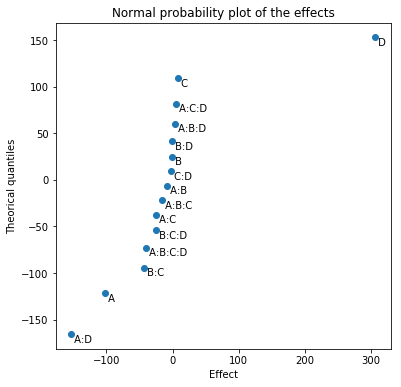

In [5]:
effects = [v*2 for v in re.params[1:]]
labels = [v for v in re.params[1:].index]

rv = st.norm(loc=np.mean(effects),scale=np.std(effects))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
(_y, _x), _ = st.probplot(effects,dist=rv)
ax.scatter(_x,_y)

for i, (e, l) in enumerate(sorted(zip(effects,labels),key=lambda v:v[0])):
    ax.text(_x[i],_y[i], ' '+l, verticalalignment='top')

ax.set_ylabel('Theorical quantiles')
ax.set_xlabel('Effect')
ax.set_title('Normal probability plot of the effects')

plt.show()

In [6]:
re = smf.ols('Respuesta ~ (A+B+C+D)**3', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,41310.5625,41310.5625,6.414621,0.239398
B,1.0,10.5625,10.5625,0.001640,0.974232
C,1.0,217.5625,217.5625,0.033783,0.884280
D,1.0,374850.0625,374850.0625,58.205967,0.082971
A:B,1.0,248.0625,248.0625,0.038519,0.876624
A:C,1.0,2475.0625,2475.0625,0.384323,0.646707
A:D,1.0,94402.5625,94402.5625,14.658641,0.162644
B:C,1.0,7700.0625,7700.0625,1.195650,0.471598
B:D,1.0,1.5625,1.5625,0.000243,0.990085
C:D,1.0,18.0625,18.0625,0.002805,0.966316


In [7]:
re = smf.ols('Respuesta ~ (A+B+C+D)**2', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,41310.5625,41310.5625,20.276491,0.006382
B,1.0,10.5625,10.5625,0.005184,0.945391
C,1.0,217.5625,217.5625,0.106786,0.757069
D,1.0,374850.0625,374850.0625,183.987907,0.000039
A:B,1.0,248.0625,248.0625,0.121757,0.741351
A:C,1.0,2475.0625,2475.0625,1.214837,0.320582
A:D,1.0,94402.5625,94402.5625,46.335673,0.001042
B:C,1.0,7700.0625,7700.0625,3.779427,0.109498
B:D,1.0,1.5625,1.5625,0.000767,0.978978
C:D,1.0,18.0625,18.0625,0.008866,0.928641


In [8]:
re = smf.ols('Respuesta ~ (A+B+C+D)**2 - B:D - C:D - A:B - A:C - B - C', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,41310.5625,41310.562500,34.536174,1.066571e-04
D,1.0,374850.0625,374850.062500,313.379588,1.970505e-09
A:D,1.0,94402.5625,94402.562500,78.921785,2.379952e-06
B:C,1.0,7700.0625,7700.062500,6.437354,2.761756e-02
Residual,11.0,13157.6875,1196.153409,NaN,NaN


# Problema 14-29
An experiment to study the effect of machining factors 
on ceramic strength was described at www.itl.nist.gov/div898/
handbook/. Five factors were considered at two levels each: A = 
Table Speed, B = Down Feed Rate, C = Wheel Grit, D = Direc-
tion, E = Batch. The response is the average of the ceramic 
strength over 15 repetitions. The following data are from a sin-
gle replicate of a $2^5$ factorial design.

In [9]:
df = pd.read_excel('problema 14-29.xlsx')
df.head()

,A,B,C,D,E,Strength
0,-1,-1,-1,-1,-1,680.45
1,1,-1,-1,-1,-1,722.48
2,-1,1,-1,-1,-1,702.14
3,1,1,-1,-1,-1,666.93
4,-1,-1,1,-1,-1,703.67


In [10]:
re = smf.ols('Strength ~ A*B*C*D*E', data=df).fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 14 Dec 2017   Prob (F-statistic):                nan
Time:                        13:33:51   Log-Likelihood:                 873.00
No. Observations:                  32   AIC:                            -1682.
Df Residuals:                       0   BIC:                            -1635.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    546.8959        inf          0        nan         nan         nan
A              5.2866        inf          0        nan         nan         nan
B             10.4541        inf          0        nan         nan         nan
A:B           12.3397        inf          0        nan         nan         nan
C            -19.8934        inf         -0        nan         nan         nan
A:C           -7.5803        inf         -0        nan         nan         nan
B:C            3.0997        inf          0        nan         nan         nan
A:B:C          3.3403        inf          0        nan         nan         nan
D            -99.2366        inf         -0        nan         nan         nan
A:D            7.1528        inf          0        nan         nan         nan
B:D            7.8516        inf          0        nan         nan         nan
A:B:D         13.5734        inf          0        nan         nan         nan
C:D           -9.9347        inf         -0        nan         nan         nan
A:C:D          0.2572        inf          0        nan         nan         nan
B:C:D         -1.1791        inf         -0        nan         nan         nan
A:B:C:D       -3.3272        inf         -0        nan         nan         nan
E            -32.4297        inf         -0        nan         nan         nan
A:E            3.8122        inf          0        nan         nan         nan
B:E            2.4947        inf          0        nan         nan         nan
A:B:E          2.1266        inf          0        nan         nan         nan
C:E           -0.9578        inf         -0        nan         nan         nan
A:C:E          0.9741        inf          0        nan         nan         nan
B:C:E          0.8941        inf          0        nan         nan         nan
A:B:C:E       -3.3366        inf         -0        nan         nan         nan
D:E            6.4441        inf          0        nan         nan         nan
A:D:E         -4.1253        inf         -0        nan         nan         nan
B:D:E         -2.2866        inf         -0        nan         nan         nan
A:B:D:E       -1.5684        inf         -0        nan         nan         nan
C:D:E          1.0072        inf          0        nan         nan         nan
A:C:D:E       -2.6972        inf         -0        nan         nan         nan
B:C:D:E        2.9016        inf          0        nan         nan         nan
A:B:C:D:E      4.3772        inf          0        nan         nan         nan
==============================================================================
Omnibus:                       17.249   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.521
Skew:                          -1.201   Prob(JB):                     6.41e-07
Ku

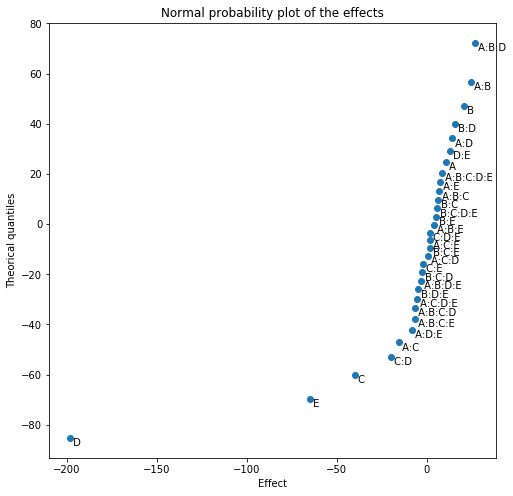

In [11]:
effects = [v*2 for v in re.params[1:]]
labels = [v for v in re.params[1:].index]

rv = st.norm(loc=np.mean(effects),scale=np.std(effects))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
(_y, _x), _ = st.probplot(effects,dist=rv)
ax.scatter(_x,_y)

for i, (e, l) in enumerate(sorted(zip(effects,labels),key=lambda v:v[0])):
    ax.text(_x[i],_y[i], ' '+l, verticalalignment='top')

ax.set_ylabel('Theorical quantiles')
ax.set_xlabel('Effect')
ax.set_title('Normal probability plot of the effects')

plt.show()

In [12]:
re = smf.ols('Strength ~ (A+B+C+D+E)**3', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,894.327778,894.327778,2.817480,1.442496e-01
B,1.0,3497.197528,3497.197528,11.017529,1.601897e-02
C,1.0,12663.963378,12663.963378,39.896399,7.353632e-04
D,1.0,315132.650778,315132.650778,992.790133,6.789876e-08
E,1.0,33653.908203,33653.908203,106.022870,4.901235e-05
A:B,1.0,4872.572403,4872.572403,15.350494,7.820247e-03
A:C,1.0,1838.756403,1838.756403,5.792796,5.280184e-02
A:D,1.0,1637.207253,1637.207253,5.157838,6.357273e-02
A:E,1.0,465.048753,465.048753,1.465084,2.716372e-01
B:C,1.0,307.458003,307.458003,0.968612,3.630334e-01


In [13]:
re = smf.ols('Strength ~ (A+B+C+D+E)**2 + A:B:D', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,894.327778,894.327778,4.123630,6.040541e-02
B,1.0,3497.197528,3497.197528,16.125128,1.123094e-03
C,1.0,12663.963378,12663.963378,58.391907,1.507560e-06
D,1.0,315132.650778,315132.650778,1453.036135,2.392143e-16
E,1.0,33653.908203,33653.908203,155.173844,2.589689e-09
A:B,1.0,4872.572403,4872.572403,22.466805,2.631894e-04
A:C,1.0,1838.756403,1838.756403,8.478269,1.073580e-02
A:D,1.0,1637.207253,1637.207253,7.548952,1.496019e-02
A:E,1.0,465.048753,465.048753,2.144280,1.637446e-01
B:C,1.0,307.458003,307.458003,1.417649,2.522927e-01


In [14]:
re = smf.ols('Strength ~ (A+B+C+D+E)**2 + A:B:D -B:E -C:E -A:E -B:C', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,894.327778,894.327778,3.994228,6.017048e-02
B,1.0,3497.197528,3497.197528,15.619110,8.547819e-04
C,1.0,12663.963378,12663.963378,56.559528,4.144206e-07
D,1.0,315132.650778,315132.650778,1407.438845,2.768463e-19
E,1.0,33653.908203,33653.908203,150.304380,1.802733e-10
A:B,1.0,4872.572403,4872.572403,21.761781,1.687629e-04
A:C,1.0,1838.756403,1838.756403,8.212215,9.896231e-03
A:D,1.0,1637.207253,1637.207253,7.312061,1.406485e-02
B:D,1.0,1972.705078,1972.705078,8.810454,7.897391e-03
C:D,1.0,3158.336503,3158.336503,14.105696,1.338293e-03


In [15]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     143.9
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           5.25e-16
Time:                        13:33:52   Log-Likelihood:                -123.64
No. Observations:                  32   AIC:                             273.3
Df Residuals:                      19   BIC:                             292.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    546.8959      2.645    206.751      0.000     541.359     552.432
A              5.2866      2.645      1.999      0.060      -0.250      10.823
B             10.4541      2.645      3.952      0.001       4.918      15.991
C            -19.8934      2.645     -7.521      0.000     -25.430     -14.357
D            -99.2366      2.645    -37.516      0.000    -104.773     -93.700
E            -32.4297      2.645    -12.260      0.000     -37.966     -26.893
A:B           12.3397      2.645      4.665      0.000       6.803      17.876
A:C           -7.5803      2.645     -2.866      0.010     -13.117      -2.044
A:D            7.1528      2.645      2.704      0.014       1.616      12.689
B:D            7.8516      2.645      2.968      0.008       2.315      13.388
C:D           -9.9347      2.645     -3.756      0.001     -15.471      -4.398
D:E            6.4441      2.645      2.436      0.025       0.908      11.981
A:B:D         13.5734      2.645      5.131      0.000       8.037      19.110
==============================================================================
Omnibus:                        5.957   Durbin-Watson:                   2.942
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.068
Skew:                          -0.525   Prob(JB):                       0.0793
Kurtosis:                       4.643   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""